In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk

In [2]:
data=pd.read_csv("C:\MLDATASETS\Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#check null values
data.isnull().sum()
#sum of all the null counts of columns

YearsExperience    0
Salary             0
dtype: int64

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.mean()

YearsExperience        5.313333
Salary             76003.000000
dtype: float64

In [7]:
data.shape

(30, 2)

<AxesSubplot:>

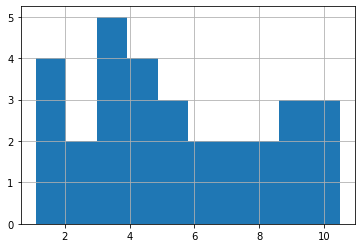

In [8]:
data["YearsExperience"].hist()
#using hist we can find type of distribution
#this is not in a linear regression

<AxesSubplot:>

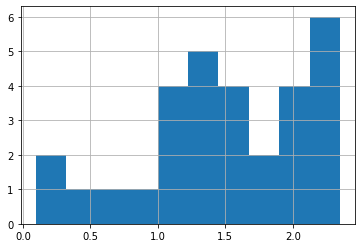

In [9]:
lg = np.log(data["YearsExperience"])
lg.hist()
#this is also not in linear regression

<AxesSubplot:>

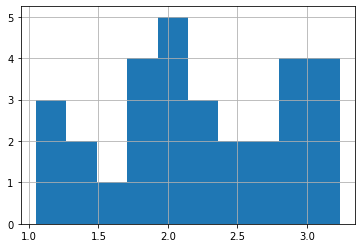

In [10]:
sq = np.sqrt(data["YearsExperience"])
sq.hist()
#this is also not in linear regression(normal distributng)

C:\Users\sreev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


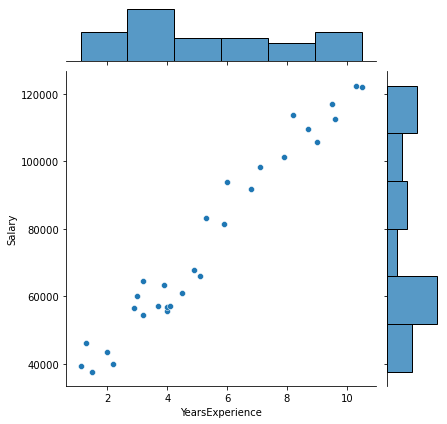

In [11]:
sb.jointplot(data["YearsExperience"],data["Salary"])
#as we can see here with increase in years of experience salary of person is increasing
# so this satisfies the linear regression as this distributes normally

seperate x and y value

In [12]:
y=data["Salary"]
x=data["YearsExperience"]

In [13]:
x

0      1.1
1      1.3
2      1.5
3      2.0
4      2.2
5      2.9
6      3.0
7      3.2
8      3.2
9      3.7
10     3.9
11     4.0
12     4.0
13     4.1
14     4.5
15     4.9
16     5.1
17     5.3
18     5.9
19     6.0
20     6.8
21     7.1
22     7.9
23     8.2
24     8.7
25     9.0
26     9.5
27     9.6
28    10.3
29    10.5
Name: YearsExperience, dtype: float64

In [14]:
y

0      39343.0
1      46205.0
2      37731.0
3      43525.0
4      39891.0
5      56642.0
6      60150.0
7      54445.0
8      64445.0
9      57189.0
10     63218.0
11     55794.0
12     56957.0
13     57081.0
14     61111.0
15     67938.0
16     66029.0
17     83088.0
18     81363.0
19     93940.0
20     91738.0
21     98273.0
22    101302.0
23    113812.0
24    109431.0
25    105582.0
26    116969.0
27    112635.0
28    122391.0
29    121872.0
Name: Salary, dtype: float64

In [15]:
#Scaling the value
from sklearn.preprocessing import scale

In [16]:
x=scale(x)

In [17]:
x
#all the values converted into the same range

array([-1.51005294, -1.43837321, -1.36669348, -1.18749416, -1.11581443,
       -0.86493538, -0.82909552, -0.75741579, -0.75741579, -0.57821647,
       -0.50653674, -0.47069688, -0.47069688, -0.43485702, -0.29149756,
       -0.1481381 , -0.07645838, -0.00477865,  0.21026054,  0.2461004 ,
        0.53281931,  0.6403389 ,  0.92705781,  1.03457741,  1.21377673,
        1.32129632,  1.50049564,  1.5363355 ,  1.78721455,  1.85889428])

In [18]:
#as now this is in array  now we have to change this to dataFrame again
x=pd.DataFrame(x,columns=["YearsExperience"])

In [19]:
x

,YearsExperience
0,-1.510053
1,-1.438373
2,-1.366693
3,-1.187494
4,-1.115814
5,-0.864935
6,-0.829096
7,-0.757416
8,-0.757416
9,-0.578216


In [20]:
y=pd.DataFrame(y,columns=["Salary"])

In [21]:
y.head()

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0


# SPLITTING DATA

In [22]:
#we need totrsin the model on the train data and test the data with test data so for that we need to split the data
from sklearn.model_selection import  train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=111)

# MODEL BUILDING

In [24]:
#import modelling function
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()
#initializing wiith function

In [26]:
#training the model with train data
model.fit(x_train,y_train)
#fitting this model with this data, model will able to learn from data  and able to identify the best fit line

LinearRegression()

#here the model(linear regression) got fitted with train data (x_train and y_train)

#now we need to check for performance 

#for that we have a function called ROOT MEAN SQUARE ERROR

RMSE

E = error = yact - ypred

SE = squared error = E*E

MSE = mean squared error = SE.mean()

RMSE = root mean square error=sqrt(MSE)

In [27]:
pred = model.predict(x_train)

In [28]:
pred

array([[ 47705.60109506],
       [ 74248.91418839],
       [ 65096.04760448],
       [ 55027.89436219],
       [ 54112.60770379],
       [109945.09386563],
       [ 76079.48750517],
       [114521.52715758],
       [ 37637.44785276],
       [ 39468.02116954],
       [ 63265.4742877 ],
       [121843.82042471],
       [107199.23389046],
       [ 56858.46767897],
       [ 56858.46767897],
       [ 81571.20745552],
       [ 41298.59448632],
       [ 61434.90097092],
       [ 82486.49411391],
       [ 99876.94062333],
       [115436.81381597],
       [123674.39374149],
       [ 64180.76094609],
       [ 89808.78738103]])

In [29]:
y_train

,Salary
4,39891.0
16,66029.0
13,57081.0
6,60150.0
5,56642.0
25,105582.0
17,83088.0
26,116969.0
0,39343.0
1,46205.0


In [30]:
from sklearn import metrics

In [31]:
mse=metrics.mean_squared_error(y_train,pred)

In [32]:
mse

26984581.772893682

In [33]:
np.sqrt(mse)

5194.668591247538

In [34]:
metrics.r2_score(y_train,pred)
#my model is able to explain 96% of the data in right way

0.9642378521537157

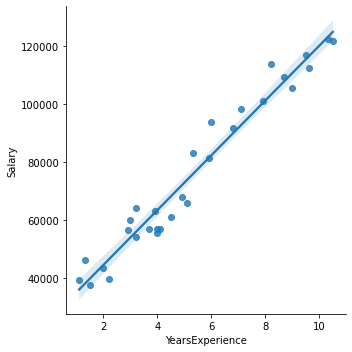

In [35]:
sb.lmplot(x="YearsExperience",y="Salary",data=data)
#this will directly plot the linear regression graph